In [21]:
%matplotlib inline

from IPython.core.pylabtools import figsize
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Loading matlab styles from
# https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers
import json
s = json.load(open("bmh_matplotlibrc.json"))
mpl.rcParams.update(s)

In [70]:
!cat bmh_matplotlibrc.json

{
  "lines.linewidth": 2.5,
  "axes.edgecolor": "#bcbcbc",
  "patch.linewidth": 0.5,
  "legend.fancybox": true,
  "axes.color_cycle": [
    "#348ABD",
    "#A60628",
    "#7A68A6",
    "#467821",
    "#CF4457",
    "#188487",
    "#E24A33"
  ],
  "axes.facecolor": "#eeeeee",
  "axes.labelsize": "large",
  "axes.grid": true,
  "patch.edgecolor": "#eeeeee",
  "axes.titlesize": "x-large",
  "svg.fonttype": "path",
  "examples.directory": ""
}


In [22]:
data = pd.read_csv('data/titanic/train.csv')

### Clean Data 
* who column
* Fix NAAN in Cabin
* More detailed Embarked column

In [23]:
# Add column to determine child man and females
def is_woman_child_or_man(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return 'man' if sex == 'male' else 'female'
        
data["Sex"].unique()
data["Who"] = data[["Age", "Sex"]].apply(is_woman_child_or_man, axis=1)
data["Embarked"] = data['Embarked'].map({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})
data = data.drop(['Ticket','Cabin'], axis=1) 
data.dropna()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Who
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,Southampton,man
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,Cherbourg,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,Southampton,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,Southampton,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,Southampton,man


### Lets plot some of the data we have

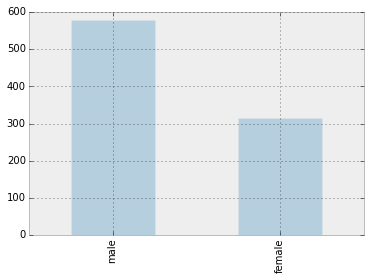

In [24]:
## Individual plots
data['Sex'].value_counts().plot(kind='bar', alpha=.3)

# draw vertical line from (70,100) to (70, 250)
plt.plot([70, 70], [100, 250], 'k-', lw=2)

# draw diagonal line from (70, 90) to (90, 200)
plt.plot([70, 90], [90, 200], 'k-')

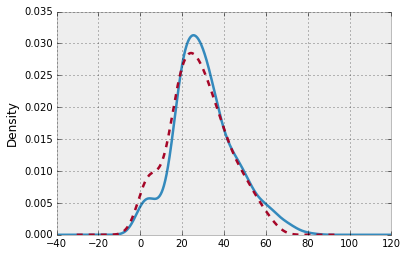

In [71]:
data['Age'][data['Sex'] == 'male'].plot(kind='kde')    
# data['Age'][data['Sex'] == 'female'].plot(kind='kde')
data['Age'][data['Sex'] == 'female'].plot(kind='kde', ls='dashed')

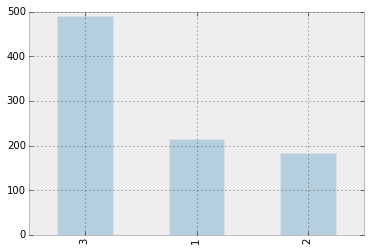

In [26]:
data['Pclass'].value_counts().plot(kind='bar', alpha=.3)

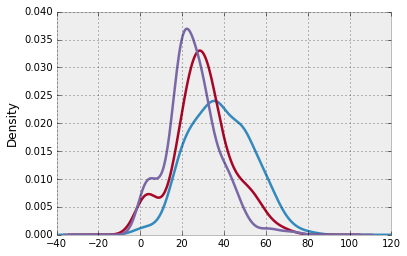

In [27]:
data['Age'][data['Pclass'] == 1].plot(kind='kde')    
data['Age'][data['Pclass'] == 2].plot(kind='kde')
data['Age'][data['Pclass'] == 3].plot(kind='kde')

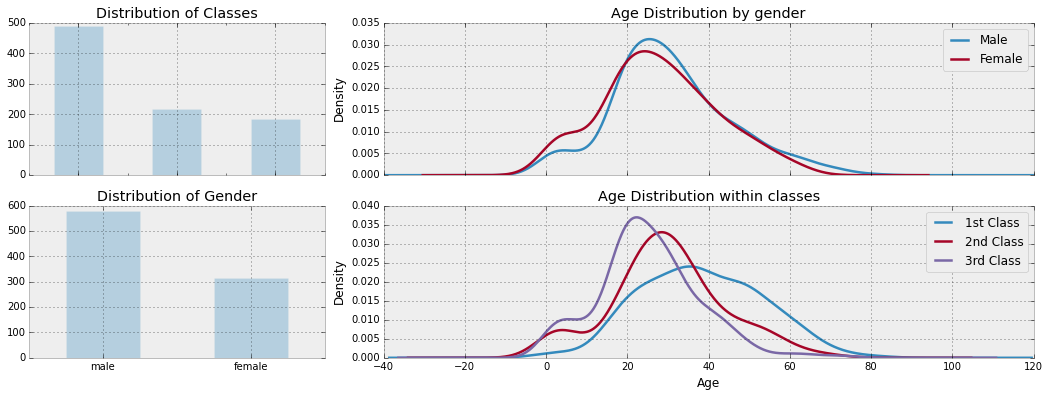

In [72]:
# TODO: x labels for bar charts
# TODO: Fill area under 
fig = plt.figure(figsize=(18,6)) 

plot_1 = plt.subplot2grid((2,3),(1,0))              
data['Sex'].value_counts().plot(kind='bar', alpha=.3)
plt.title("Distribution of Gender")  
locs, labels = plt.xticks()
plt.setp(labels, rotation=0)

plot_2 = plt.subplot2grid((2,3),(0,1), colspan=2)
data['Age'][data['Sex'] == 'male'].plot(kind='kde')    
data['Age'][data['Sex'] == 'female'].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age Distribution by gender")
plt.legend(('Male', 'Female'),loc='best') 

plot_3 = plt.subplot2grid((2,3),(0,0))              
data['Pclass'].value_counts().plot(kind='bar', alpha=.3)
plt.title("Distribution of Classes")

plot_4 = plt.subplot2grid((2,3),(1,1), colspan=2)
a = data['Age'][data['Pclass'] == 1]
# data['Age'][data['Pclass'] == 1].plot(kind='kde')    
data['Age'][data['Pclass'] == 1].plot(kind='kde', sharex=True)    
data['Age'][data['Pclass'] == 2].plot(kind='kde')
data['Age'][data['Pclass'] == 3].plot(kind='kde')

plt.xlabel("Age")    
plt.title("Age Distribution within classes")
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

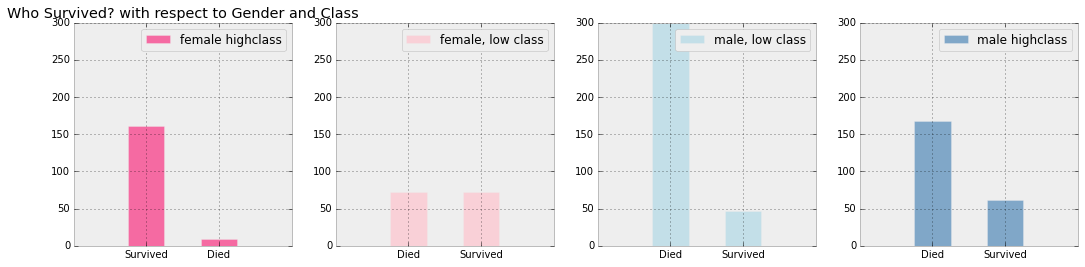

In [74]:
df = data
fig = plt.figure(figsize=(18,4))
alpha_level = 0.65

ax1=fig.add_subplot(141)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
# female_highclass.plot(kind='bar', label='female highclass', color='#FA2479', alpha=alpha_level)
female_highclass.plot(kind='bar', label='female highclass', color='#FA2479', alpha=alpha_level, sharey=True)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

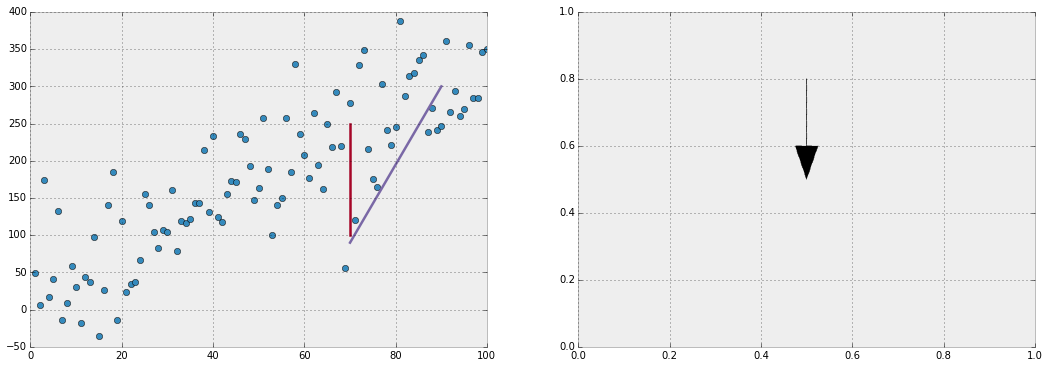

In [45]:
np.random.seed(5)
x = np.arange(1, 101)
y = 20 + 3 * x + np.random.normal(0, 60, 100)

fig = plt.figure(figsize=(18,6)) 
plt.subplot(121)
plt.plot(x, y, "o")

# draw vertical line from (70,100) to (70, 250)
plt.plot([70, 70], [100, 250])

# draw diagonal line from (70, 90) to (90, 200)
plt.plot([70, 90], [90, 300])

plt.subplot(122)
plt.arrow( 0.5, 0.8, 0.0, -0.2, fc="k", ec="k", head_width=0.05, head_length=0.1)

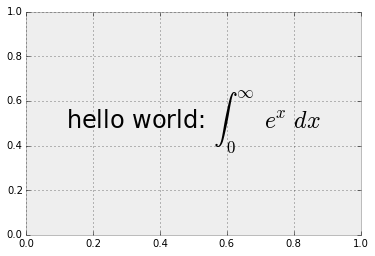

In [60]:
fig, ax = plt.subplots()

ax.text(0.5, 0.5, 'hello world: $\int_0^\infty e^x dx$', size=24, ha='center', va='center')

In [12]:
from IPython.core.display import HTML

def css_styling():
    styles = open("custom_style.css", "r").read() #or edit path to custom.css
    return HTML(styles)
css_styling()